### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()


In [3]:
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


In [4]:
import matplotlib.pyplot as plt
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]


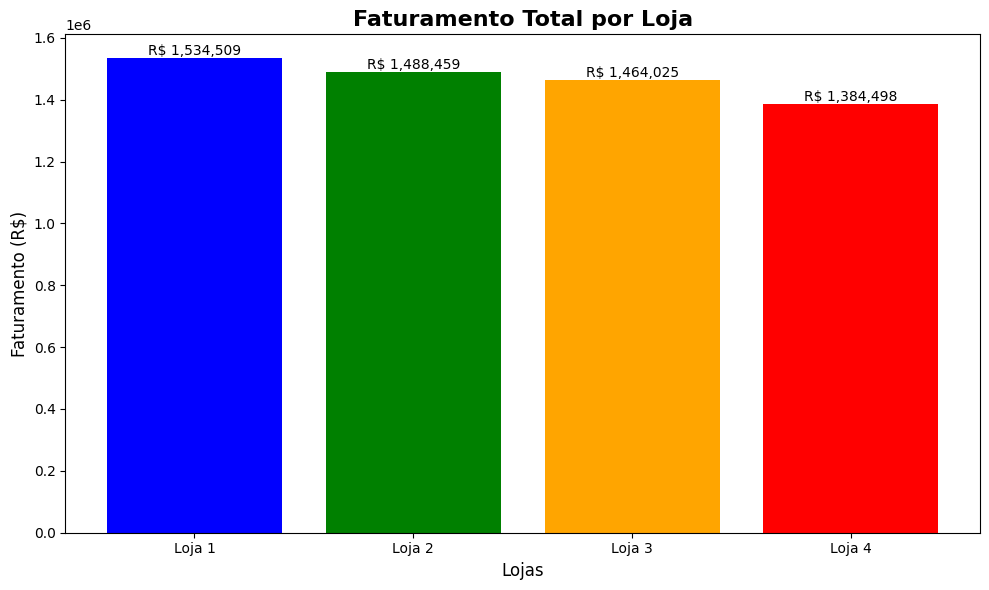

In [5]:
plt.figure(figsize=(10, 6))  # Tamanho da figura (largura, altura)
plt.bar(lojas, faturamentos, color=['blue', 'green', 'orange', 'red'])  # Criar barras

# Adicionar título e rótulos
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Adicionar os valores em cima das barras
for i, valor in enumerate(faturamentos):
    plt.text(i, valor, f'R$ {valor:,.0f}', ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta para não cortar nada
plt.show()

# 2. Vendas por Categoria

In [6]:
# Contar vendas por categoria em cada loja
vendas_cat_loja1 = loja['Categoria do Produto'].value_counts()
vendas_cat_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_cat_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_cat_loja4 = loja4['Categoria do Produto'].value_counts()

# Mostrar resultados da Loja
print("Vendas por categoria - Loja 1:")
print(vendas_cat_loja1)

print("Vendas por categoria - Loja 2:")
print(vendas_cat_loja2)

print("Vendas por categoria - Loja 3:")
print(vendas_cat_loja3)

print("Vendas por categoria - Loja 4:")
print(vendas_cat_loja4)

Vendas por categoria - Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
Vendas por categoria - Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
Vendas por categoria - Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
Vendas por categoria - Loja 4:
Categoria do Produto
moveis            

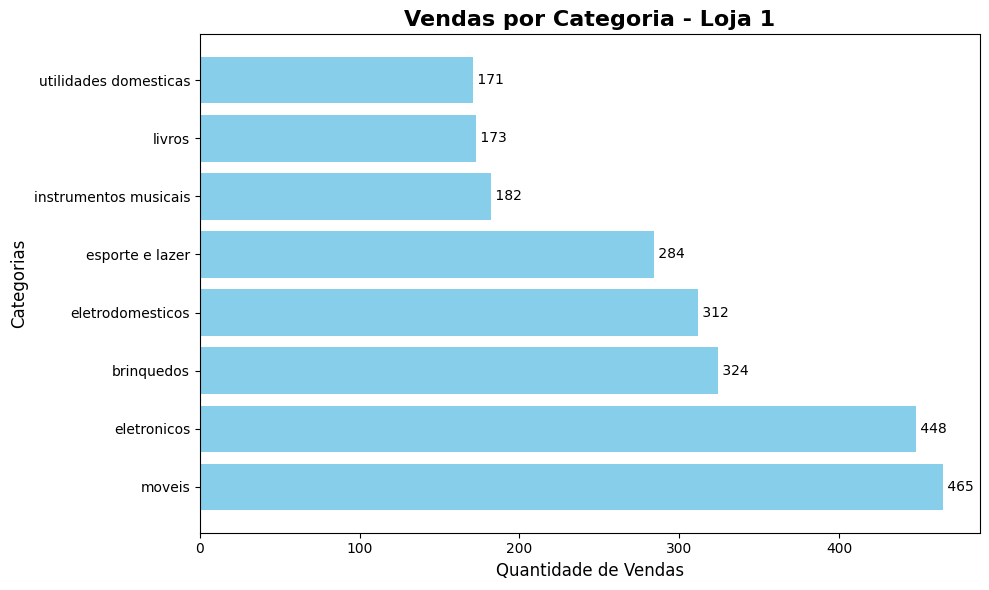

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(vendas_cat_loja1.index, vendas_cat_loja1.values, color='skyblue')

plt.title('Vendas por Categoria - Loja 1', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Vendas', fontsize=12)
plt.ylabel('Categorias', fontsize=12)

# Adicionar valores nas barras
for i, valor in enumerate(vendas_cat_loja1.values):
    plt.text(valor, i, f' {valor}', va='center')

plt.tight_layout()
plt.show()

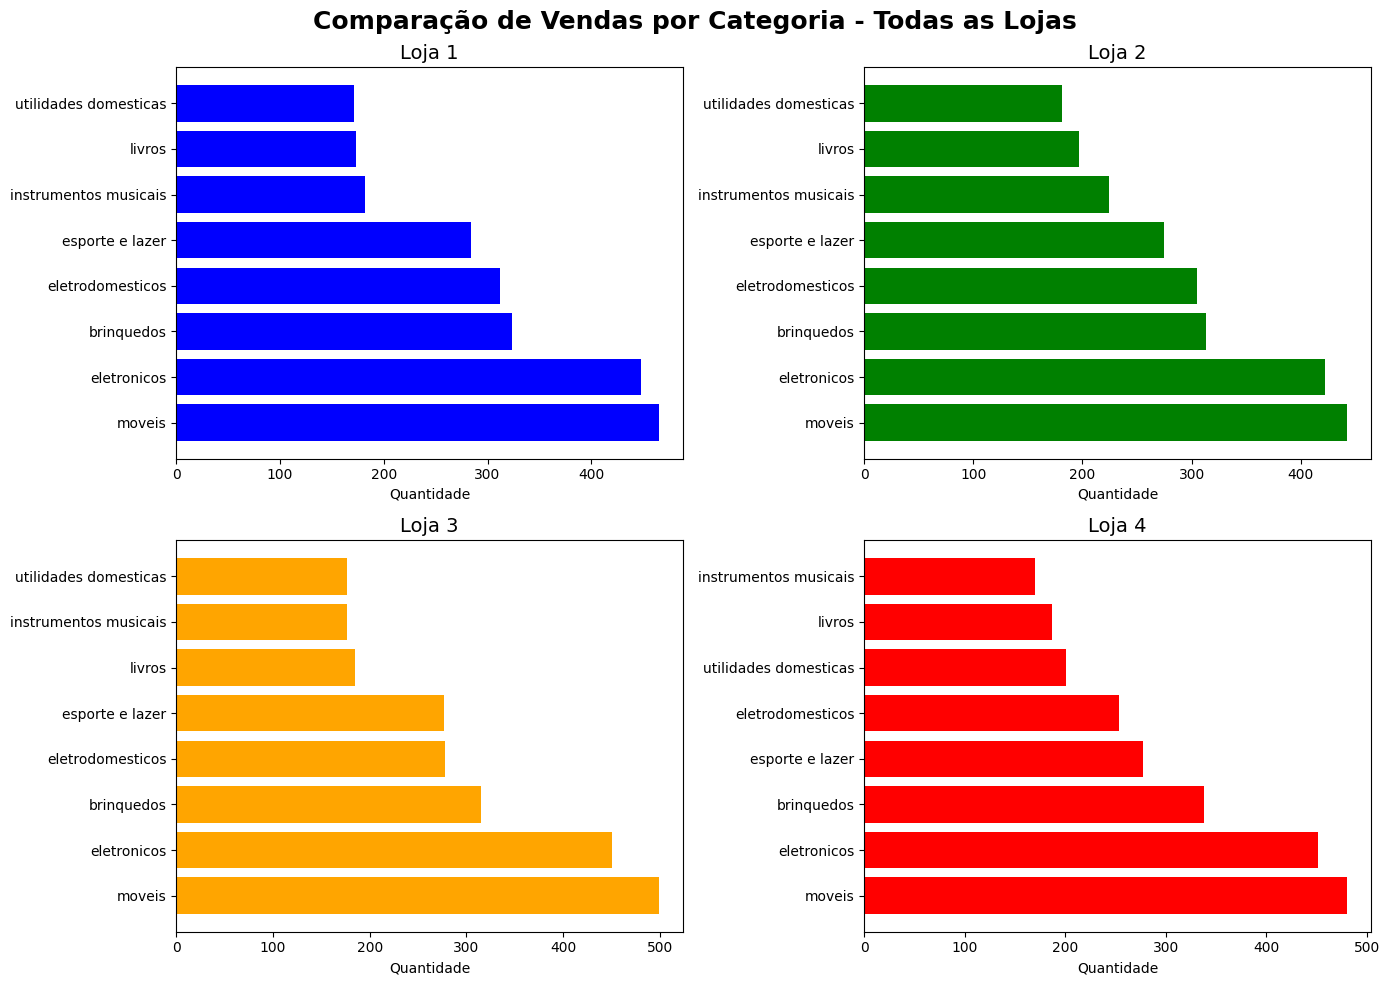

In [8]:
# Criar subplots (4 gráficos, um para cada loja)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparação de Vendas por Categoria - Todas as Lojas', fontsize=18, fontweight='bold')

# Loja 1
axes[0, 0].barh(vendas_cat_loja1.index, vendas_cat_loja1.values, color='blue')
axes[0, 0].set_title('Loja 1', fontsize=14)
axes[0, 0].set_xlabel('Quantidade')

# Loja 2
axes[0, 1].barh(vendas_cat_loja2.index, vendas_cat_loja2.values, color='green')
axes[0, 1].set_title('Loja 2', fontsize=14)
axes[0, 1].set_xlabel('Quantidade')

# Loja 3
axes[1, 0].barh(vendas_cat_loja3.index, vendas_cat_loja3.values, color='orange')
axes[1, 0].set_title('Loja 3', fontsize=14)
axes[1, 0].set_xlabel('Quantidade')

# Loja 4
axes[1, 1].barh(vendas_cat_loja4.index, vendas_cat_loja4.values, color='red')
axes[1, 1].set_title('Loja 4', fontsize=14)
axes[1, 1].set_xlabel('Quantidade')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [9]:
# Calcular a média de avaliação de cada loja
media_aval_loja1 = loja['Avaliação da compra'].mean()
media_aval_loja2 = loja2['Avaliação da compra'].mean()
media_aval_loja3 = loja3['Avaliação da compra'].mean()
media_aval_loja4 = loja4['Avaliação da compra'].mean()

# Mostrar os resultados
print(f"Média de Avaliação - Loja 1: {media_aval_loja1:.2f} ⭐")
print(f"Média de Avaliação - Loja 2: {media_aval_loja2:.2f} ⭐")
print(f"Média de Avaliação - Loja 3: {media_aval_loja3:.2f} ⭐")
print(f"Média de Avaliação - Loja 4: {media_aval_loja4:.2f} ⭐")

Média de Avaliação - Loja 1: 3.98 ⭐
Média de Avaliação - Loja 2: 4.04 ⭐
Média de Avaliação - Loja 3: 4.05 ⭐
Média de Avaliação - Loja 4: 4.00 ⭐


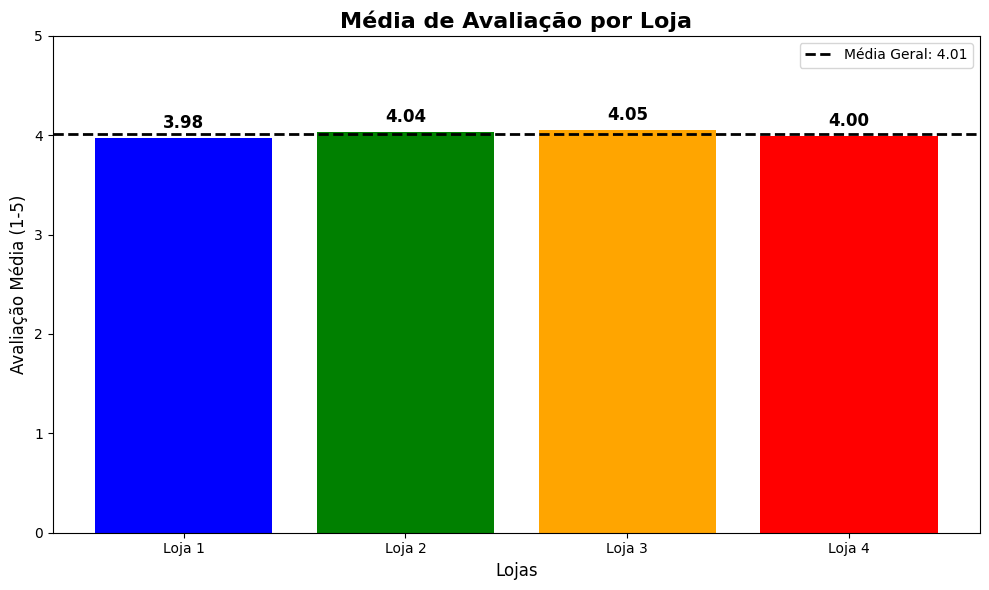

In [10]:
# Preparar os dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [media_aval_loja1, media_aval_loja2, media_aval_loja3, media_aval_loja4]

# Cria gráfico de barras
plt.figure(figsize=(10, 6))
cores = ['blue', 'green', 'orange', 'red']
barras = plt.bar(lojas, medias, color=cores)

plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5)  # Define o limite do eixo Y de 0 a 5

# Adiciona valores em cima das barras
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', fontsize=12, fontweight='bold')

# Adiciona linha de referência (média geral)
media_geral = sum(medias) / len(medias)
plt.axhline(y=media_geral, color='black', linestyle='--', linewidth=2, label=f'Média Geral: {media_geral:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [11]:
# Contar vendas por produto em cada loja
vendas_prod_loja1 = loja['Produto'].value_counts()
vendas_prod_loja2 = loja2['Produto'].value_counts()
vendas_prod_loja3 = loja3['Produto'].value_counts()
vendas_prod_loja4 = loja4['Produto'].value_counts()

# Mostrar os 5 MAIS vendidos e 5 MENOS vendidos da Loja 1
print("=" * 50)
print("LOJA 1 - TOP 5 MAIS VENDIDOS:")
print("=" * 50)
print(vendas_prod_loja1.head(5))

print("\n" + "=" * 50)
print("LOJA 1 - TOP 5 MENOS VENDIDOS:")
print("=" * 50)
print(vendas_prod_loja1.tail(5))

LOJA 1 - TOP 5 MAIS VENDIDOS:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

LOJA 1 - TOP 5 MENOS VENDIDOS:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


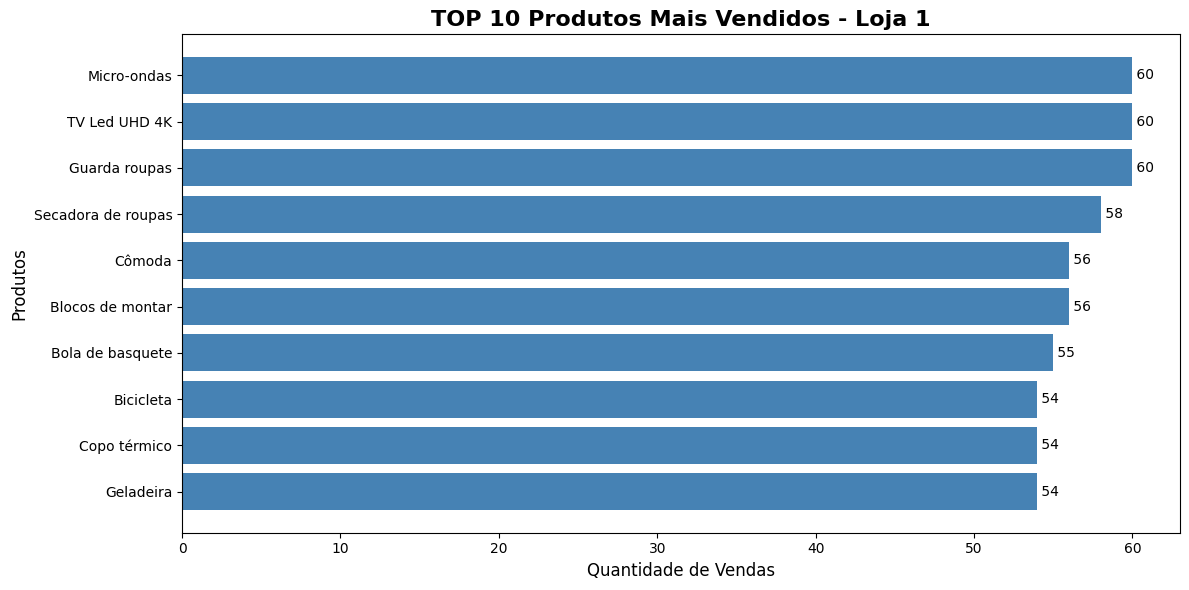

In [12]:
# Pegar apenas os TOP 10 mais vendidos
top10_loja1 = vendas_prod_loja1.head(10)

# Criar gráfico
plt.figure(figsize=(12, 6))
plt.barh(top10_loja1.index, top10_loja1.values, color='steelblue')

plt.title('TOP 10 Produtos Mais Vendidos - Loja 1', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Vendas', fontsize=12)
plt.ylabel('Produtos', fontsize=12)

# Adicionar valores nas barras
for i, valor in enumerate(top10_loja1.values):
    plt.text(valor, i, f' {valor}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Inverte para o mais vendido ficar em cima
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

In [13]:
# Calcular o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Mostrar os resultados
print(f"Frete Médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete Médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete Médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete Médio - Loja 4: R$ {frete_medio_loja4:.2f}")

Frete Médio - Loja 1: R$ 34.69
Frete Médio - Loja 2: R$ 33.62
Frete Médio - Loja 3: R$ 33.07
Frete Médio - Loja 4: R$ 31.28


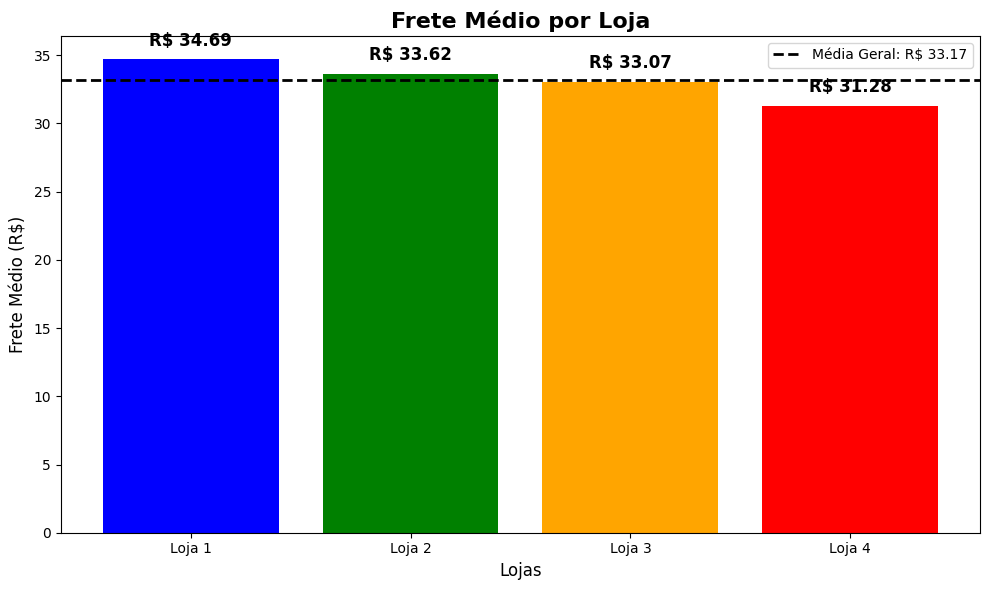

In [14]:
# Preparar dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

# Criar gráfico
plt.figure(figsize=(10, 6))
cores = ['blue', 'green', 'orange', 'red']
barras = plt.bar(lojas, fretes, color=cores)

plt.title('Frete Médio por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)

# Adicionar valores em cima das barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 1, f'R$ {valor:.2f}', ha='center', fontsize=12, fontweight='bold')

# Linha de referência da média geral
frete_geral = sum(fretes) / len(fretes)
plt.axhline(y=frete_geral, color='black', linestyle='--', linewidth=2, label=f'Média Geral: R$ {frete_geral:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

## Recomendação Final: Qual Loja Vender?

Após análise detalhada dos dados de vendas, avaliações e desempenho das 4 lojas da rede Alura Store, cheguei à seguinte conclusão:

---

### Dados Analisados:
- Faturamento total de cada loja
- Vendas por categoria
- Média de avaliações dos clientes
- Produtos mais e menos vendidos
- Frete médio

---

### Análise das Lojas:

**Loja 1:** Apresenta o maior faturamento (R$ 1.534.509,12), o que demonstra alto volume de vendas. Porém, possui a pior avaliação média entre todas as lojas e cobra o frete mais caro, indicando problemas na experiência do cliente.

**Loja 2:** Possui o segundo maior faturamento (R$ 1.488.459,06) e a segunda melhor avaliação média, mantendo um desempenho equilibrado entre vendas e satisfação dos clientes.

**Loja 3:** Apesar de ter o terceiro maior faturamento (R$ 1.464.025,03), destaca-se por ter a melhor avaliação média, mostrando excelente qualidade no atendimento e satisfação dos clientes.

**Loja 4:** Apresenta o menor faturamento de todas (R$ 1.384.497,58), representando aproximadamente 10% a menos que a Loja 1. Embora tenha o frete mais barato e uma avaliação levemente superior à Loja 1, o baixo volume de vendas indica menor eficiência operacional.

---

### Recomendação:

Com base nos dados apresentados, **recomendo que o Senhor João venda a Loja 4**.

**Justificativa:** A Loja 4 apresenta o pior desempenho em faturamento, gerando aproximadamente R$ 150.000,00 a menos que a líder. Apesar de ter o frete mais barato e uma avaliação razoável, esses pontos positivos não compensam o baixo volume de vendas. A diferença de aproximadamente 10% no faturamento, somada ao menor número de transações, caracteriza esta loja como a menos eficiente da rede.

Embora a Loja 1 tenha problemas com avaliação e frete, seu alto faturamento indica potencial de melhoria. Investimentos em qualidade do atendimento e logística poderiam transformá-la em uma unidade ainda mais lucrativa. Já a Loja 4, mesmo com frete competitivo, não demonstra a mesma capacidade de geração de receita.